In [1]:
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [2]:
from PIL import Image
path = '../images/256/'
# im = Image.open(path + 'waldo/1_1_1.jpg')
# im.to_thumb(128,128)

In [3]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#307) [Path('../images/256/notwaldo/15_1_0.jpg'),Path('../images/256/notwaldo/16_0_0.jpg'),Path('../images/256/notwaldo/20_0_2.jpg'),Path('../images/256/notwaldo/15_3_2.jpg'),Path('../images/256/notwaldo/16_2_2.jpg'),Path('../images/256/notwaldo/20_2_0.jpg'),Path('../images/256/notwaldo/5_2_2.jpg'),Path('../images/256/notwaldo/6_3_2.jpg'),Path('../images/256/notwaldo/5_0_0.jpg'),Path('../images/256/notwaldo/6_1_0.jpg')...]

In [4]:
failed = verify_images(filenames)
failed

(#0) []

In [5]:
img = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.5, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256)], 
    batch_tfms=[Flip(p=0.5)])

In [6]:
dls = img.dataloaders(path)

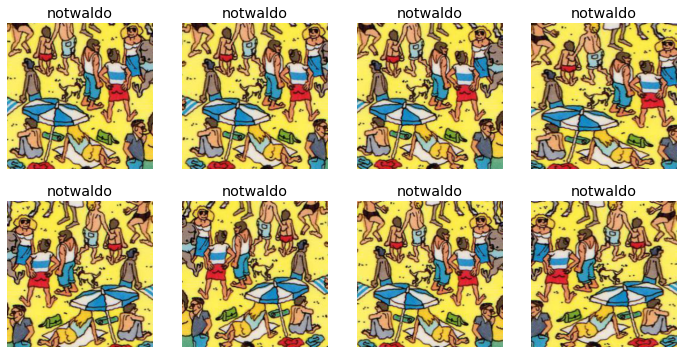

In [7]:
img = img.new(item_tfms=[RandomResizedCrop(256, min_scale=0.8)])
dls = img.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [8]:

metrics = [accuracy, error_rate]
our_out_of_the_box_model = cnn_learner(dls, vgg16_bn, loss_func=CrossEntropyLossFlat(), metrics=metrics)
our_out_of_the_box_model.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.438808,0.564864,0.718954,0.281046,01:19


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.326657,0.666651,0.568627,0.431373,02:03
1,1.338965,0.735953,0.529412,0.470588,02:01
2,1.221425,0.769960,0.483660,0.516340,02:05


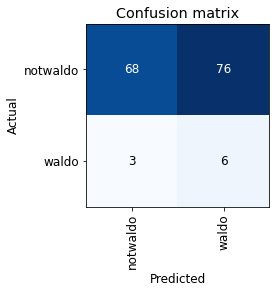

In [9]:
interp = ClassificationInterpretation.from_learner(our_out_of_the_box_model)
interp.plot_confusion_matrix()

In [10]:
our_out_of_the_box_model.save('model')
our_out_of_the_box_model.export()